In [ ]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression

In [ ]:
data=pd.read_csv('train_set.csv')
data.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


In [ ]:
data.dtypes
data.describe()

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
count,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000
mean,2014.250104,2.976007,490.540186,26913.060020,63262.713139,4401.037115,8932.876472,97990.329882
std,1.016282,1.575586,333.238723,15539.719696,44638.657748,11079.137749,4894.072024,67750.020573
min,2013.000000,1.000000,1.000000,1.000000,-68771.000000,-12308.000000,-2940.470000,-74082.000000
25%,2013.000000,2.000000,236.000000,13434.000000,23406.000000,0.000000,4358.347500,35977.000000
50%,2014.000000,2.000000,535.000000,27013.000000,62504.500000,0.000000,11982.035000,98033.000000
75%,2015.000000,4.000000,790.000000,40397.250000,93000.250000,2738.000000,12801.790000,142138.250000
max,2016.000000,7.000000,990.000000,53794.000000,515101.000000,227313.000000,21872.800000,653498.000000


In [ ]:
data.isnull().sum()
data=data[data.Union.notna()]
data=data[data.JF.notna()]
data.drop_duplicates(inplace=True)

In [ ]:
for i in data.columns:
  print(i,':',set(list(data[i])))

Year : {2016, 2013, 2014, 2015}
OGC : {1, 2, 3, 4, 5, 6, 7}
OG : {'Public Protection', 'Human Welfare & Neighborhood Development', 'General City Responsibilities', 'Culture & Recreation', 'General Administration & Finance', 'Public Works, Transportation & Commerce', 'Community Health'}
DC : {'CRT', 'ECN', 'DPH', 'DBI', 'CFC', 'AAM', 'MTA', 'FAM', 'FIR', 'PDR', 'HRC', 'CSC', 'ADM', 'DAT', 'WTR', 'CPC', 'PRT', 'SHF', 'POL', 'CON', 'ENV', 'LLB', 'RNT', 'PAB', 'ETH', 'WAR', 'CII', 'HSS', 'HHP', 'DPW', 'PUC', 'LIB', 'AIR', 'CSS', 'CWP', 'UNA', 'ADP', 'CAT', 'REC', 'DSS', 'RET', 'BOS', 'CHF', 'HRD', 'REG', 'WOM', 'JUV', 'ECD', 'TIS', 'TTX', 'ASR', 'SCI', 'ART', 'MYR'}
Dept : {'Treasurer/Tax Collector', 'PUC Water Department', 'Recreation and Park Commission', 'Mayor', 'Retirement System', 'Rent Arbitration Board', 'Airport Commission', 'Public Defender', 'Fire Department', 'Superior Court', 'Public Health', 'Community Investment & Infrastructure', 'PUC Hetch Hetchy', 'Environment', 'General 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
data.isna().sum()

Year                  0
OGC                   0
OG                    0
DC                    0
Dept                  0
UC                    0
Union                 0
JF                    0
Job                   0
EI                    0
Salaries              0
Overtime              0
H/D                   0
YT                    0
Total_Compensation    0
dtype: int64

In [ ]:
groupog=data.groupby('OG').mean()
groupog


,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
OG,,,,,,,,
Community Health,2014.228268,3.999202,548.034953,27066.014373,63471.475616,1462.869698,8138.685335,94917.290819
Culture & Recreation,2014.250260,4.997115,666.207223,27048.611553,32482.480020,915.127418,6124.703470,49403.299796
General Administration & Finance,2014.246130,5.987964,419.633050,26803.176974,62787.876045,736.387732,8434.744395,91026.798491
General City Responsibilities,2013.416382,6.993174,427.832765,27447.081911,9804.668942,967.389078,1449.840246,16950.825939
Human Welfare & Neighborhood Development,2014.293179,2.999437,421.918714,26568.943092,44786.853054,757.200886,7750.392324,66613.985538
Public Protection,2014.242491,1.003185,721.697271,26824.145242,88815.531053,11726.320246,10813.442262,142350.717094
"Public Works, Transportation & Commerce",2014.260339,2.003098,302.197256,26954.891365,62321.301157,5140.820945,9668.743439,98824.331298


In [ ]:
data.corr()

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
Year,1.000000,-0.006071,-0.003762,0.001886,0.004696,0.015089,-0.013391,0.006309
OGC,-0.006071,1.000000,-0.006263,0.002011,-0.217594,-0.303153,-0.232939,-0.270031
UC,-0.003762,-0.006263,1.000000,-0.001502,-0.047414,0.059783,-0.073324,-0.032358
EI,0.001886,0.002011,-0.001502,1.000000,-0.004097,-0.001052,-0.003179,-0.003667
Salaries,0.004696,-0.217594,-0.047414,-0.004097,1.000000,0.271418,0.774855,0.972587
Overtime,0.015089,-0.303153,0.059783,-0.001052,0.271418,1.000000,0.312348,0.453364
H/D,-0.013391,-0.232939,-0.073324,-0.003179,0.774855,0.312348,1.000000,0.806266
Total_Compensation,0.006309,-0.270031,-0.032358,-0.003667,0.972587,0.453364,0.806266,1.000000


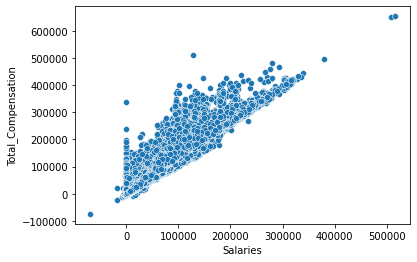

In [ ]:
sns.scatterplot(x=data.Salaries,y=data.Total_Compensation)

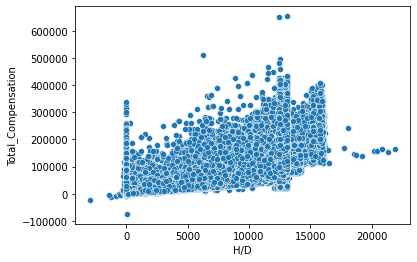

In [ ]:
sns.scatterplot(x=data['H/D'],y=data.Total_Compensation)

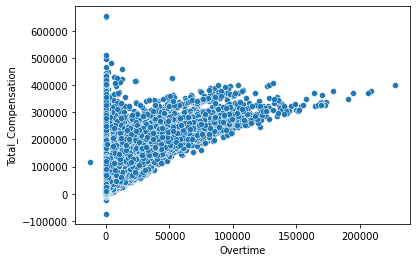

In [ ]:
sns.scatterplot(x=data.Overtime,y=data.Total_Compensation)

In [ ]:
data2 = data[['OGC','Salaries','H/D','Overtime','Total_Compensation']]
data2.head()

,OGC,Salaries,H/D,Overtime,Total_Compensation
0,4,12196,0.00,0,16158
1,4,74639,12703.31,2820,115784
2,6,100554,12424.50,0,144708
3,1,140164,13043.87,52754,242323
4,2,58813,7655.28,0,82106


In [ ]:
# encoding
dummies=pd.get_dummies(data2.OGC,prefix='OGC')
dummies.head()


,OGC_1,OGC_2,OGC_3,OGC_4,OGC_5,OGC_6,OGC_7
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0


In [ ]:
data2=pd.concat([data2,dummies],axis=1)
data2.drop('OGC',axis=1,inplace=True)


In [ ]:
data2

,Salaries,H/D,Overtime,Total_Compensation,OGC_1,OGC_2,OGC_3,OGC_4,OGC_5,OGC_6,OGC_7
0,12196,0.000000,0,16158,0,0,0,1,0,0,0
1,74639,12703.310000,2820,115784,0,0,0,1,0,0,0
2,100554,12424.500000,0,144708,0,0,0,0,0,1,0
3,140164,13043.870000,52754,242323,1,0,0,0,0,0,0
4,58813,7655.280000,0,82106,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
287153,111641,12512.560000,37343,200562,0,1,0,0,0,0,0
287154,66728,8379.990000,0,92987,0,1,0,0,0,0,0
287155,6971,3102.636267,0,11280,0,0,1,0,0,0,0
287156,97557,13054.930000,31811,173855,0,1,0,0,0,0,0


In [ ]:
#defining feature and target variable
 
X=data2.drop('Total_Compensation',axis=1)

y=data2.Total_Compensation

In [ ]:
# Model building
linear=LinearRegression()

# train test split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=7)
linear.fit(X_train,y_train)
y_pred = linear.predict(X_test)



array([233233.0660148 ,   1710.79109335, 115731.70081162, ...,
         5239.65336648, 101970.56097973, 131796.03570843])